In [1]:
from langgraph.graph import StateGraph
from typing import TypedDict

In [2]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str

In [3]:
# first node
def first_node(state : AgentState) -> AgentState:
    """ This is the first node of our sequence"""
    state['final'] = f"Hi {state['name']}!"

    return state

def second_node(state : AgentState)->AgentState:
    """This is the second node of our sequence"""

    state['final'] +=  f"You are {state['age']} old."

    return state

In [4]:
# how do we build this graph
graph = StateGraph(AgentState)

# add nodes
graph.add_node("node1", first_node)
graph.add_node("node2", second_node)

graph.set_entry_point("node1")

graph.add_edge("node1", "node2")

graph.set_finish_point("node2")

app = graph.compile()



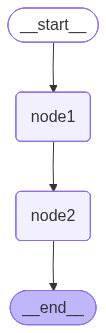

In [5]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
results = app.invoke(
    {
        "name" : "Shree",
        "age" : 22
    }
)

In [7]:
print(results)

{'name': 'Shree', 'age': 22, 'final': 'Hi Shree!You are 22 old.'}
